In [1]:
# ============  Regressor  ============================\n",
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


#============== Metric ===========================================
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# ============= Normalization ===================
from sklearn.preprocessing import MinMaxScaler

# ============= Splitting =======================
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

# ===============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# ======================= KOROSI =============================================
data_Train       = pd.read_excel(r'Data_Train_Korosi_260.xlsx')
data_Test        = pd.read_excel(r'Data_Validasi_Korosi_260.xlsx')
data_ALL         = pd.read_excel(r'Data_ALL_Korosi_260.xlsx')         # data train dan validasi
data_UJI         = pd.read_excel(r'Data_Test_Model_ARX.xlsx')
data_Unrealistis = pd.read_excel(r'Data_ unrealistic_Korosi_260.xlsx') 
data_Train.head()


,Common_name,Molecular_weight MW (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Ionization Energy I (eV),Electron Affinity A (eV),Electronegativity (eV),Hardness (eV),Electrophilicity (eV),ΔN_Fe,IEFe(%),ARX-Model,KNN+VSG
0,Caffeine,194.19,14.00,-0.07,-0.97,58.44,18.96,-5.769,-1.977,5.769,1.977,3.873,1.896,0.96825,0.824631,92.0,91.454087,91.618182
1,Acetaminophen,151.16,9.90,0.91,-1.60,49.33,15.52,-5.494,-1.646,5.494,1.646,3.570,1.924,0.89250,0.891372,85.8,89.054481,86.207273
2,Acetazolamide,222.30,8.80,-0.26,-2.36,115.04,19.16,-7.010,-3.358,7.010,3.358,5.184,1.826,1.29600,0.497262,93.0,89.005598,92.914545
3,Acetic acid,60.05,4.80,-0.17,1.22,37.30,5.34,-6.816,-1.070,6.816,1.070,3.943,2.873,0.98575,0.532022,92.0,88.551715,91.612727
4,Aminobenzoic acid,137.14,3.38,0.83,-0.40,63.32,13.44,-5.922,-2.122,5.922,2.122,4.022,1.900,1.00550,0.783684,80.0,85.884393,80.707273


In [4]:
data_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Common_name                  69 non-null     object 
 1   Molecular_weight MW (g/mol)  69 non-null     float64
 2   pKa                          69 non-null     float64
 3   Log P                        69 non-null     float64
 4   Log S                        69 non-null     float64
 5   Polar Surface Area (Å2)      69 non-null     float64
 6   Polarizability (Å3)          69 non-null     object 
 7   HOMO (eV)                    69 non-null     float64
 8   LUMO (eV)                    69 non-null     float64
 9   Ionization Energy I (eV)     69 non-null     float64
 10  Electron Affinity A (eV)     69 non-null     float64
 11  Electronegativity (eV)       69 non-null     float64
 12  Hardness  (eV)               69 non-null     float64
 13  Electrophilicity (eV) 

In [5]:
# Preprosessing
data_Test.columns

Index(['Common_name', 'Molecular_weight MW (g/mol)', 'pKa', 'Log P', 'Log S',
       'Polar Surface Area (Å2)', 'Polarizability (Å3)', 'HOMO (eV)',
       'LUMO (eV)', 'Ionization Energy I (eV)', 'Electron Affinity A (eV)',
       'Electronegativity (eV)', 'Hardness  (eV)', 'Electrophilicity (eV)  ',
       ' ΔN_Fe ', 'IEFe(%)', 'ARX-Model', 'KNN + VSG', 'Unnamed: 18', 'ARX'],
      dtype='object')

In [6]:
# Preprosessing
data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Common_name                  62 non-null     object 
 1   Molecular_weight MW (g/mol)  62 non-null     float64
 2   pKa                          62 non-null     float64
 3   Log P                        62 non-null     float64
 4   Log S                        62 non-null     float64
 5   Polar Surface Area (Å2)      62 non-null     float64
 6   Polarizability (Å3)          62 non-null     object 
 7   HOMO (eV)                    62 non-null     float64
 8   LUMO (eV)                    62 non-null     float64
 9   Ionization Energy I (eV)     62 non-null     float64
 10  Electron Affinity A (eV)     62 non-null     float64
 11  Electronegativity (eV)       62 non-null     float64
 12  Hardness  (eV)               62 non-null     float64
 13  Electrophilicity (eV) 

In [7]:
'''
10 fitur dan 1 target (IEFe(%)) yg dibutuhkan:
=====================================================
Molecular_weight MW (g/mol)  78 non-null     float64
pKa                          78 non-null     float64
Log P                        78 non-null     float64
Log S                        76 non-null     float64
Polar Surface Area (Å2)      78 non-null     float64
Polarizability (Å3)          77 non-null     object
HOMO (eV)                    78 non-null     float64
LUMO (eV)                    78 non-null     float64
Electrophilicity (eV)        78 non-null     float64
ΔN_Fe                        78 non-null     float64
IEFe(%)                      78 non-null     float64
=====================================================

akan tetapi 'Polarizability (Å3)' dan bertype object, harus diubah menjadi float
dengan cara:
           data['Polarizability (Å3)'] = data['Polarizability (Å3)'].apply(lambda x: float(x))

'''
data_Train['Polarizability (Å3)'] = data_Train['Polarizability (Å3)'].apply(lambda x: float(x))
data_Test['Polarizability (Å3)']  = data_Test['Polarizability (Å3)'].apply(lambda x: float(x))
data_ALL['Polarizability (Å3)']   = data_ALL['Polarizability (Å3)'].apply(lambda x: float(x))
data_UJI['Polarizability (Å3)']   = data_UJI['Polarizability (Å3)'].apply(lambda x: float(x))

data_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Common_name                  69 non-null     object 
 1   Molecular_weight MW (g/mol)  69 non-null     float64
 2   pKa                          69 non-null     float64
 3   Log P                        69 non-null     float64
 4   Log S                        69 non-null     float64
 5   Polar Surface Area (Å2)      69 non-null     float64
 6   Polarizability (Å3)          69 non-null     float64
 7   HOMO (eV)                    69 non-null     float64
 8   LUMO (eV)                    69 non-null     float64
 9   Ionization Energy I (eV)     69 non-null     float64
 10  Electron Affinity A (eV)     69 non-null     float64
 11  Electronegativity (eV)       69 non-null     float64
 12  Hardness  (eV)               69 non-null     float64
 13  Electrophilicity (eV) 

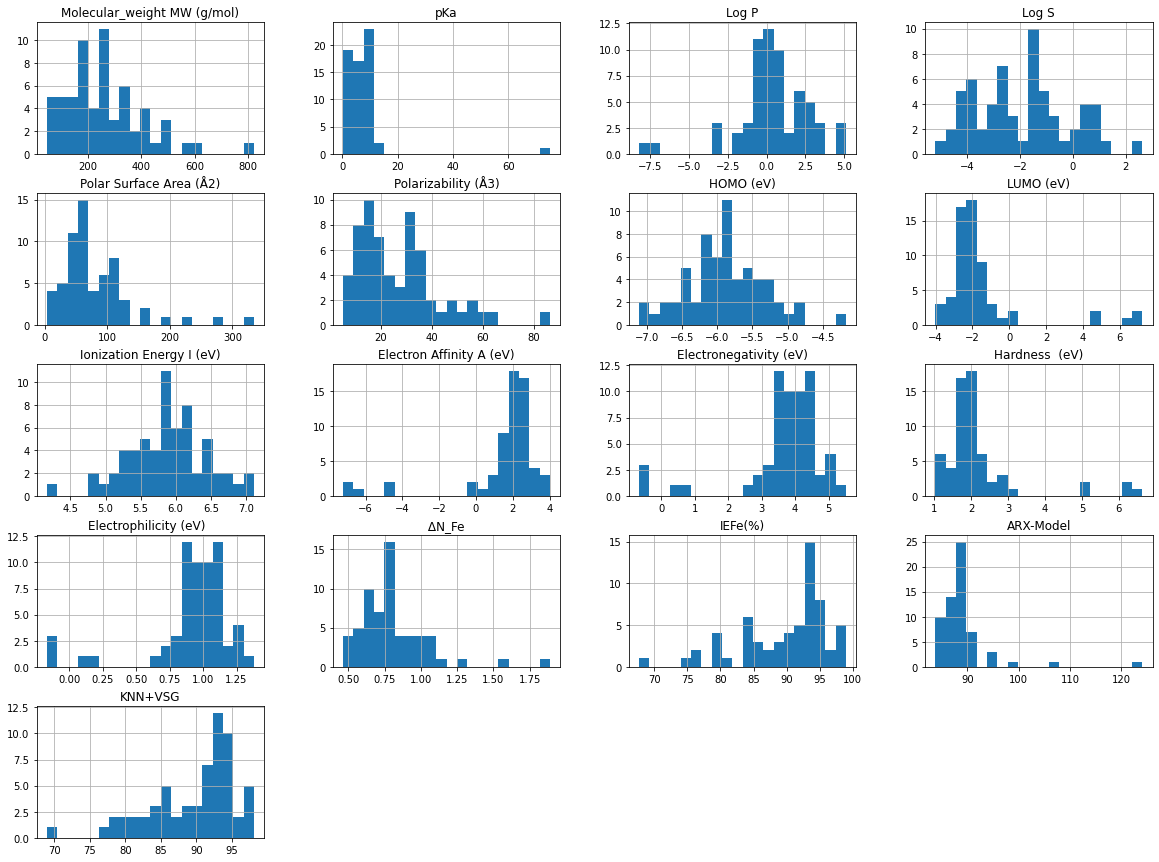

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
data_Train.hist(bins=20, figsize=(20,15))
plt.show()

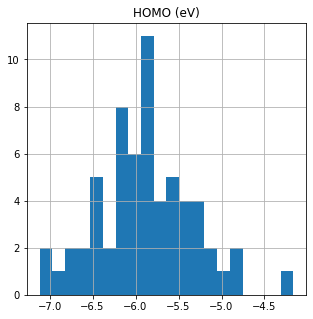

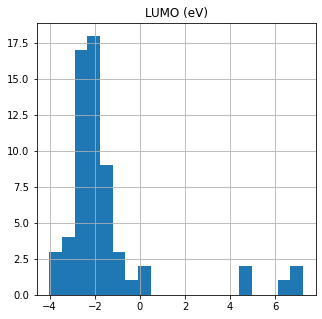

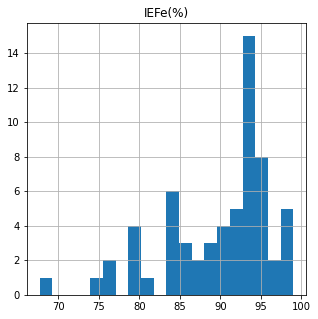

In [9]:
# Histogram sebelum ditambah sampel virtual
# =========================================

%matplotlib inline
import matplotlib.pyplot as plt

data_Train[['HOMO (eV)']].hist(bins=20, figsize=(5,5))
data_Train[['LUMO (eV)']].hist(bins=20, figsize=(5,5))
data_Train[['IEFe(%)']].hist(bins=20, figsize=(5,5))

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'LUMO Distribution')

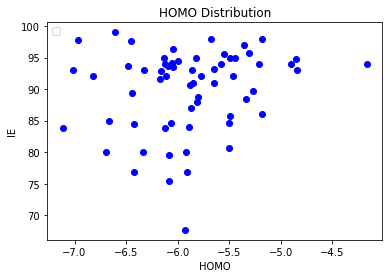

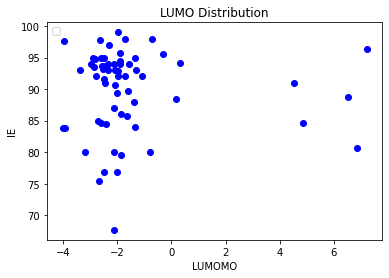

In [10]:
HOMO = data_Train['HOMO (eV)'].values
LUMO = data_Train['LUMO (eV)'].values
IE   = data_Train['IEFe(%)'].values

plt.figure()
plt.scatter(HOMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("HOMO")
plt.title('HOMO Distribution')

plt.figure()
plt.scatter(LUMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("LUMOMO")
plt.title('LUMO Distribution')

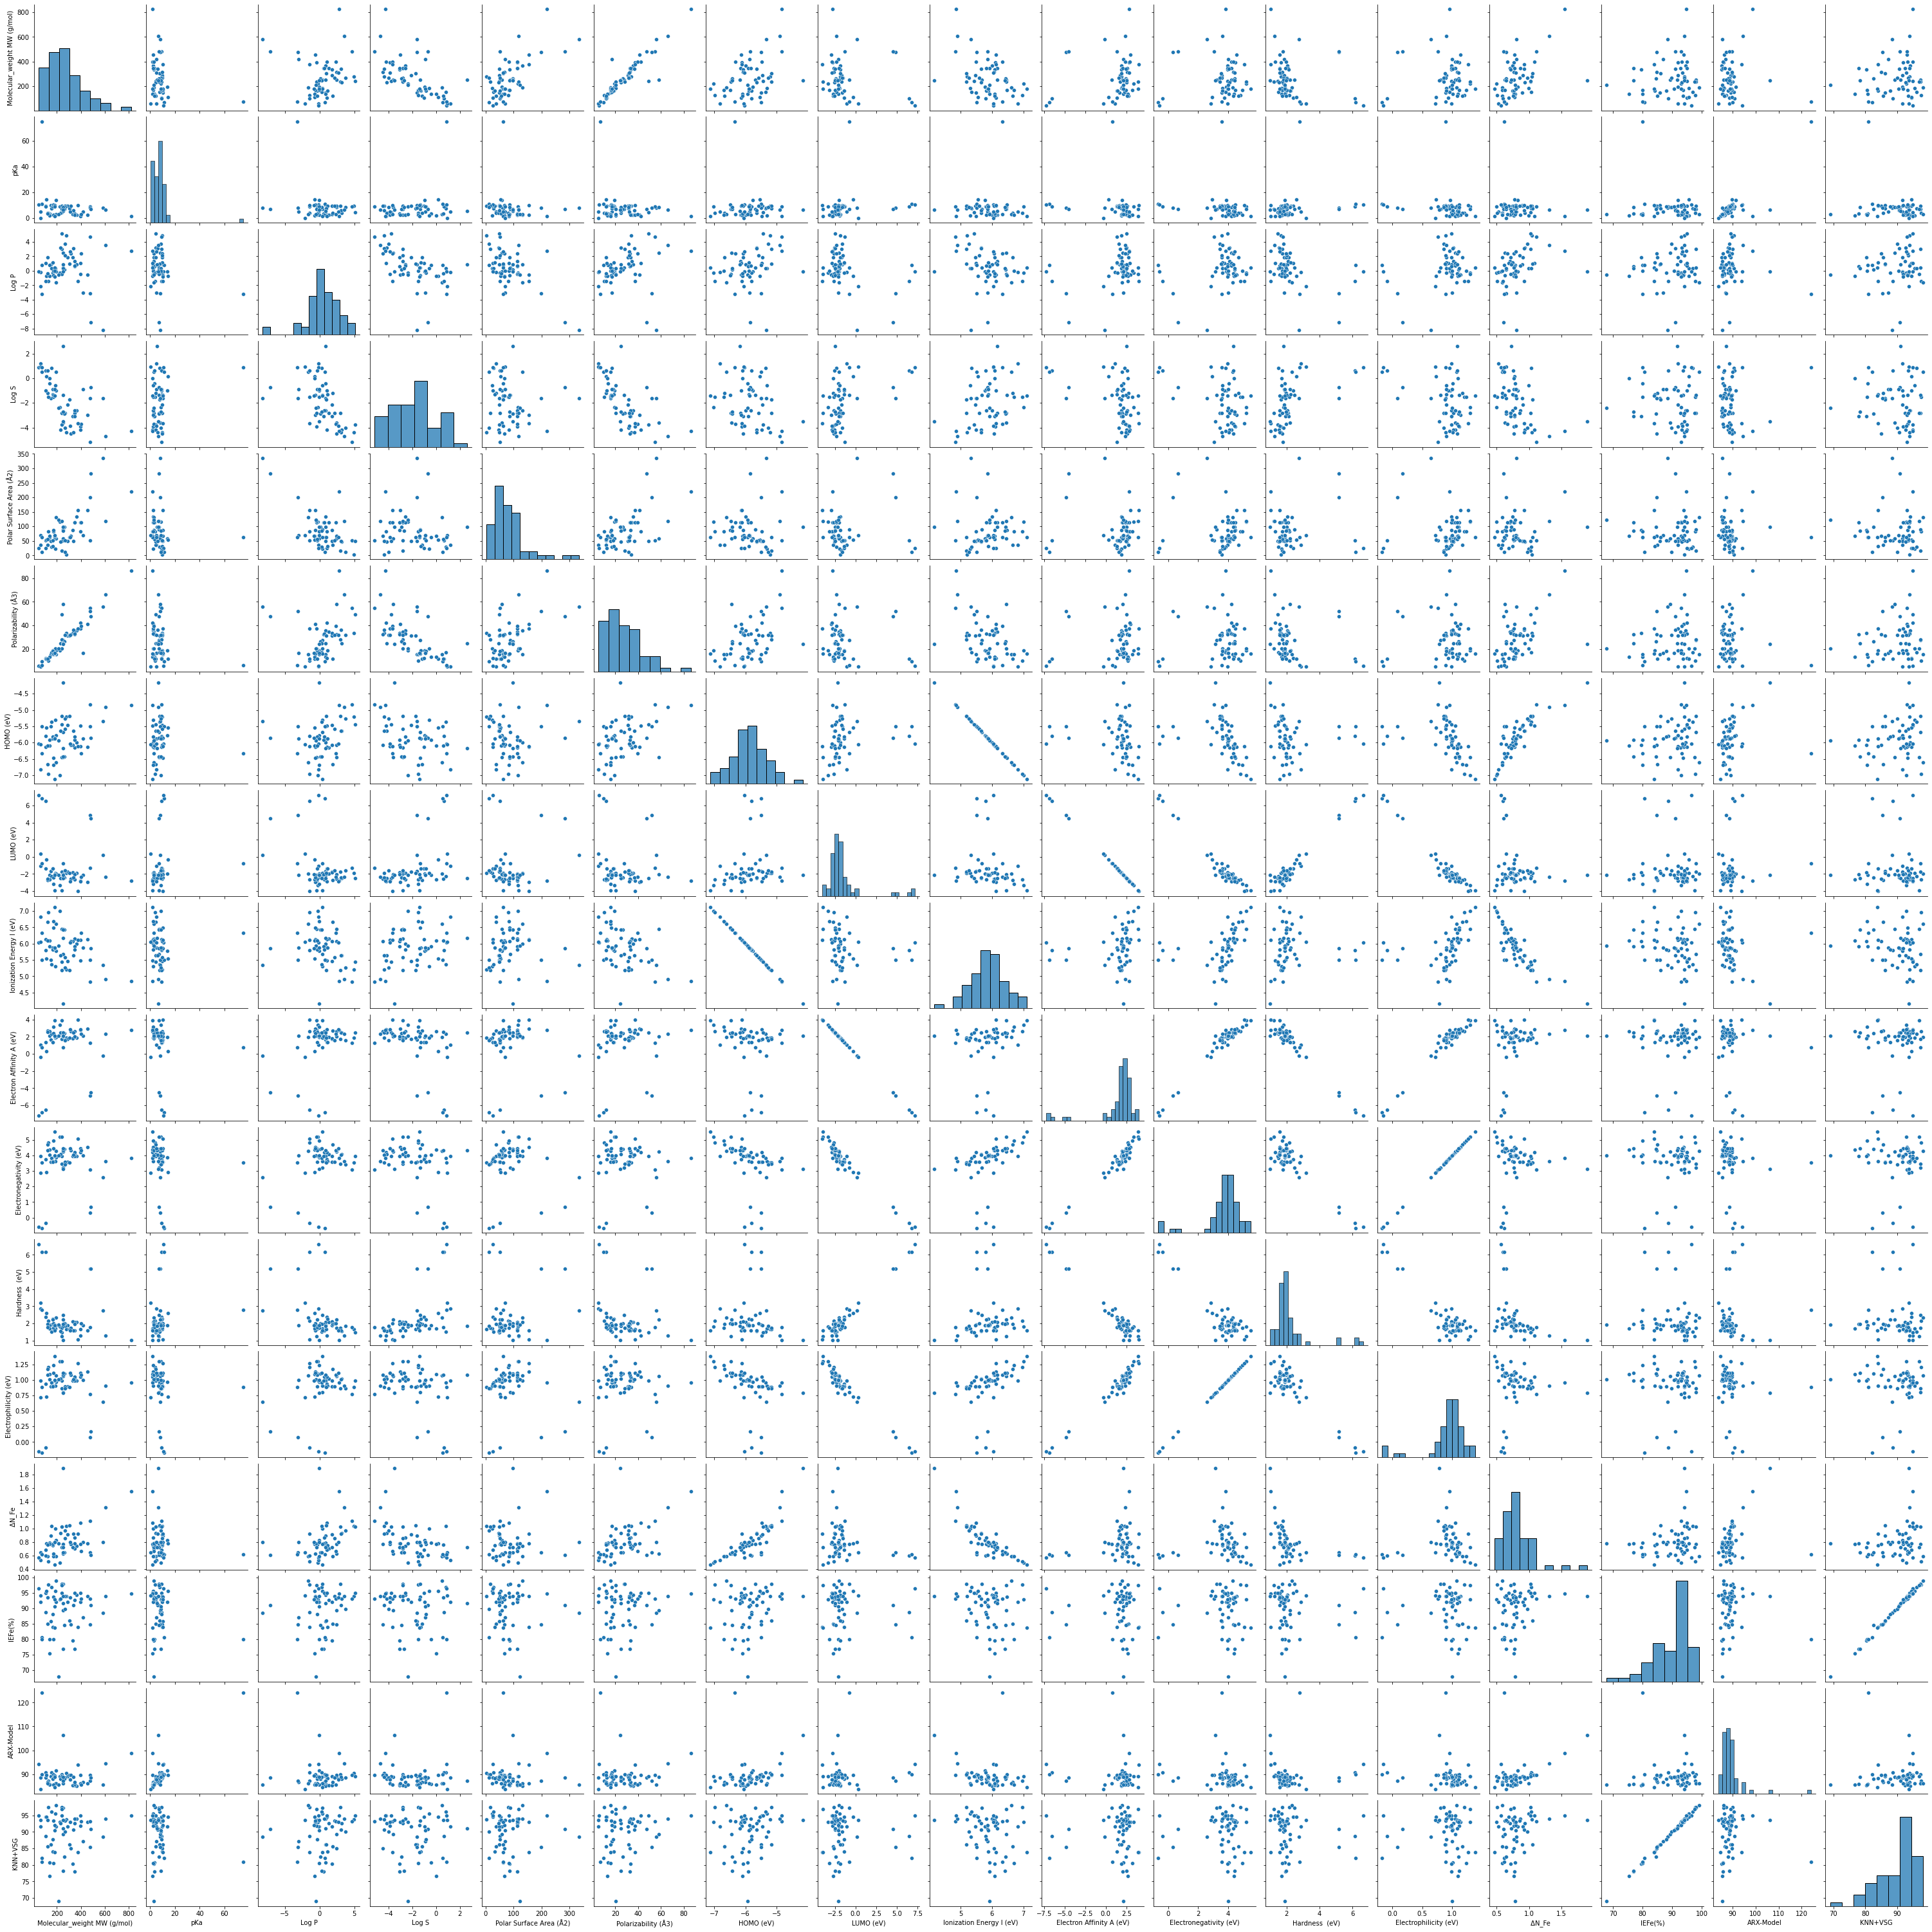

In [11]:
sns.pairplot(data_Train)

In [11]:
# ======================= KOROSI =============================================

kolom_X=['Molecular_weight MW (g/mol)', 'pKa', 'Log P', 'Log S',
       'Polar Surface Area (Å2)', 'Polarizability (Å3)', 'HOMO (eV)',
       'LUMO (eV)', 'Electrophilicity (eV)  ',' ΔN_Fe ']

data_ALL_X = data_ALL[kolom_X] 
data_ALL_Y = data_ALL['IEFe(%)'] 

X_train = data_Train[kolom_X]
Y_train = data_Train['IEFe(%)']

X_test = data_Test[kolom_X]         #untuk validasi
Y_test = data_Test['IEFe(%)']       #untuk validasi

# data yg nilai IE nya akan ditentukan (data unseen)
X_UJI  = data_UJI[kolom_X]          #untuk evaluasi

X_Unrealistis=data_Unrealistis[kolom_X]

Y_ARX = data_ALL['ARX-Model']




In [13]:
# Descriptor correlation to target IE: before adding virtual samples
# =======================================================================
from scipy.stats import spearmanr  

kolom_X=['Molecular_weight MW (g/mol)', 'pKa', 'Log P', 'Log S',
       'Polar Surface Area (Å2)', 'Polarizability (Å3)', 'HOMO (eV)',
       'LUMO (eV)', 'Electrophilicity (eV)  ',' ΔN_Fe ']
for i in range(len(kolom_X)):
    # calculate spearman's correlation
    x = data_ALL_X[kolom_X[i]]
    y = data_ALL_Y
    coef, p = spearmanr(x, y)
    print(kolom_X[i],': ', np.round(coef,3))
    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % np.round(p,3))
    else:
        print('Samples are correlated (reject H0) p=%.3f' % np.round(p,3))
    print()

Molecular_weight MW (g/mol) :  0.048
Samples are uncorrelated (fail to reject H0) p=0.694

pKa :  -0.025
Samples are uncorrelated (fail to reject H0) p=0.841

Log P :  0.103
Samples are uncorrelated (fail to reject H0) p=0.401

Log S :  -0.067
Samples are uncorrelated (fail to reject H0) p=0.582

Polar Surface Area (Å2) :  -0.05
Samples are uncorrelated (fail to reject H0) p=0.686

Polarizability (Å3) :  0.096
Samples are uncorrelated (fail to reject H0) p=0.432

HOMO (eV) :  0.219
Samples are uncorrelated (fail to reject H0) p=0.071

LUMO (eV) :  -0.003
Samples are uncorrelated (fail to reject H0) p=0.978

Electrophilicity (eV)   :  -0.106
Samples are uncorrelated (fail to reject H0) p=0.385

 ΔN_Fe  :  0.227
Samples are uncorrelated (fail to reject H0) p=0.060



In [16]:
# ============================================
# Training and testing the Model  
# ============================================
kolom=['Molecular_weight MW (g/mol)', 'pKa', 'Log P', 'Log S',
       'Polar Surface Area (Å2)', 'Polarizability (Å3)', 'HOMO (eV)',
       'LUMO (eV)', 'Electrophilicity (eV)  ',' ΔN_Fe ']

data_ALL_X = data_ALL[kolom]        #data train + validasi
data_ALL_Y = data_ALL['IEFe(%)']    #data train + validasi

X_train = data_Train[kolom]
Y_train = data_Train['IEFe(%)']

X_test = data_Test[kolom]          # data validasi
y_test = data_Test['IEFe(%)']      # data validasi

# data yg nilai IE nya akan ditentukan (data unseen)
X_UJI  = data_UJI[kolom]           # data evaluasi

X_Unrealistis=data_Unrealistis[kolom]

Y_ARX = data_ALL['ARX-Model']      # hasil prediksi ARX
# ========================================================


X = X_train.values
Y = Y_train.values

# Initialise the Scaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)  # X_normal
X_test = scaler.fit_transform(X_test)  # X_normal


# ==============================
from sklearn.model_selection import KFold

# Leave-One -Out adalah  jumlah fold sama dengan jumlah data training
kfold = KFold(n_splits=62, shuffle=True, random_state=1)
# enumerate the splits and summarize the distributions


rmsec=[]
rmsecv=[]
rmse  =[]
r1=[]
for train_ix, test_ix in kfold.split(X, Y):
    # select rows
    X_train1, X_val = X[train_ix], X[test_ix]
    y_train1, y_val = Y[train_ix], Y[test_ix]

    #=======================================
    model = KNeighborsRegressor()

        
    model.fit(X_train1, y_train1)
    y_pred_train  = model.predict(X_train1)
    y_pred_test   = model.predict(X_test)
    y_pred_val    = model.predict(X_val)
    
    temp_rmsec    = np.sqrt(mean_squared_error(y_train1, y_pred_train))
    temp_rmsecv   = np.sqrt(mean_squared_error(y_val, y_pred_val))
    temp_rmse     = np.sqrt(mean_squared_error(y_test,y_pred_test))
    temp_r1       = r2_score(y_test,y_pred_test)
    #=======================================================================================
    
    rmsec.append(temp_rmsec)
    rmsecv.append(temp_rmsecv)
    rmse.append(temp_rmse)
    r1.append(temp_r1)

#=======================================

# Prediksi Pelatihan
print('Training Predictions')
print('===========================')
print('RMSECV    ',str(model),':',np.round(np.mean(rmsecv),3))
print('RMSE_test ',str(model),':',np.round(np.mean(rmse),3))
print('R^2_test  ',str(model),':',np.round(np.mean(r1),3))
print()
print()
print('=================================')
print('Testing ARX: From Refference ')
print('=================================')
print('MAPE : 5.18%')
print('SD   : 2.51%')
print('RMSE : 4.87')
print('MSE  : 23.8')
print()

RMSECV  = np.round(np.mean(rmsecv),3)
RMSE    = np.round(np.mean(rmse),3)
R2_RATA = np.round(np.mean(temp_r1),3)

# Predicting all of data
# ====================================

X_ALL = data_ALL[kolom]  
X_ALL = scaler.fit_transform(X_ALL)  # X_normal

Y_ALL = data_ALL['IEFe(%)']
Y_ARX = data_ALL['ARX-Model'].values

y_pred_KNN = np.round(model.predict(X_ALL),2)
r2_1       = r2_score(Y_ALL,y_pred_KNN)
r2_2       = r2_score(Y_ALL,Y_ARX)

RMSE1 = np.sqrt(mean_squared_error(Y_ALL, y_pred_KNN))
RMSE2 = np.sqrt(mean_squared_error(Y_ALL, Y_ARX))


# cetak hasil prediksi seluruh data
#print('Prediction of all Data')
#print('======================')
#print('RMSE',str(model),' :',np.round(RMSE1,3))
#print('RMSE ARX           :',np.round(RMSE2,3))
#print('R^2 ',str(model),' :',np.round(np.mean(r2_1),3))
#print('R^2 ARX            :',np.round(np.mean(r2_2),3))




Training Predictions
RMSECV     KNeighborsRegressor() : 5.738
RMSE_test  KNeighborsRegressor() : 7.113
R^2_test   KNeighborsRegressor() : -0.237


Testing ARX: From Refference 
MAPE : 5.18%
SD   : 2.51%
RMSE : 4.87
MSE  : 23.8



In [17]:
# ======================================================
# HCVSG (Hamiltonian Circuit Virtual Samples Generation)
# ======================================================

kolom=['Molecular_weight MW (g/mol)', 'pKa', 'Log P', 'Log S',
       'Polar Surface Area (Å2)', 'Polarizability (Å3)', 'HOMO (eV)',
       'LUMO (eV)', 'Electrophilicity (eV)  ',' ΔN_Fe ']


data_ALL_X = data_ALL[kolom]        #data train + validasi
data_ALL_Y = data_ALL['IEFe(%)']    #data train + validasi

X_train = data_Train[kolom]
Y_train = data_Train['IEFe(%)']

X_test = data_Test[kolom]          # data validasi
y_test = data_Test['IEFe(%)']      # data validasi

# data yg nilai IE nya akan ditentukan (data unseen)
X_UJI  = data_UJI[kolom]           # data evaluasi

X_Unrealistis=data_Unrealistis[kolom]

Y_ARX = data_ALL['ARX-Model']      # hasil prediksi ARX
# ========================================================



X_ALL = data_ALL_X.values
X = X_train.values
Y = Y_train.values


In [20]:
def Xmin_Xmax(X):  #mencari nilai min dan max tiap-tiap kolom
    X_min=[]
    X_max=[]
    for i in range(len(X[1,:])):   # baris ke-1, semua kolom \n",
        X_min=X_min + [np.min(X[0:, i:i+1])]  #mengambil nilai min pd setiap kolom
        X_max=X_max + [np.max(X[0:, i:i+1])]  #mengambil nilai max pd setiap kolom
    
    X_min=np.array(X_min)
    X_max=np.array(X_max)
    return X_min, X_max
    
def Gabung_X_Xmin_Xmax(X, X_min, X_max): #data digabung dg min max sbg patokan
    X = np.vstack((X,X_min))
    X = np.vstack((X,X_max))
    return X
    
def Normalisasi(X):
    scaler = MinMaxScaler()
    normal = scaler.fit_transform(X)
    return normal
    
def Split_X_Xmin_Xmax(X):
    X=X[0:-2,:]  # dua baris terakhir dibuang
    return X
    
def preprosesing(X, X_min, X_max):
    Gabung = Gabung_X_Xmin_Xmax(X, X_min, X_max)
    Normal = Normalisasi(Gabung)
    Split_normal = Split_X_Xmin_Xmax(Normal)
    return Split_normal

def Denormalisasi(X_normal,X_min, X_max):
    X = np.vstack((X_min, X_max))
    scaler = MinMaxScaler()
    scaler.fit_transform(X)
    X_inv = scaler.inverse_transform(X_normal)
    return X_inv

X_min, X_max = Xmin_Xmax(X_ALL)  #mencari nilai min dan max tiap-tiap kolom

In [21]:
regressor_Non_VSG = KNeighborsRegressor(1)
regressor_VSG = KNeighborsRegressor(1)

In [23]:
# ==========================  METODE VSGBC : Searching VSGP ==========================

J_sampel = [50]       
Batas    = 4.5 # Theta

Seed_angka = 1 + np.arange(1)

for Jumlah_sampel in J_sampel:
    
    # ================================= Pengambilan sampel Training ====================================================\n",
    for Random_Data_Split in Seed_angka:
        
        # 1 Dtrain > 9 jalur
        Rand_D_Split  = []
        Rand_VSGP     = []
        Kinerja1 = []
        Kinerja2 = []
        Counter  = 0
        
        Jumlah_sampel_test=len(X)-np.array(Jumlah_sampel)
        x_t, x_uji, y_t, y_uji = train_test_split(X, Y, test_size=Jumlah_sampel_test, random_state=Random_Data_Split)
        
        x_t   = X       # training data have been predetermined
        y_t   = Y       
        x_uji = X_test  # testing data have been predetermined
        y_uji = Y_test
        
        x_tr   = preprosesing(x_t, X_min, X_max)
        x_test = preprosesing(x_uji, X_min, X_max)
        y_tr   = y_t.reshape(-1,1)
        y_test = y_uji  #.reshape(-1,1)
        
        # ==========  Predict Non VSG ===================================\n",
        regressor_Non_VSG.fit(x_tr, y_tr) #training the algorithm\n",
        y_pred_Non_VSG = regressor_Non_VSG.predict(x_test)
        # =======================================================\n",
        
        
        No_bil_acak = 1+ np.arange(5000) 
        # =================================  Pengacakan posisi Array ==========================\n",
        for Random_VSGP in No_bil_acak:
            
            x_latih, y_latih = shuffle(x_tr, y_tr, random_state= Random_VSGP)   # Posisi Array diacak\n",          
            y_latih  = y_latih.reshape(-1,1)
            #agar posisi terakhir terhubung dg posisi awal\n",
            x_latih = np.vstack(([x_latih,x_latih[0]]))         
            y_latih = np.vstack(([y_latih,y_latih[0]]))
            
            Juml_fitur=len(X[0])      
            X1= np.zeros(Juml_fitur);     
            Y1=[0];  
            

            # ==================== Awal VSG      ===================================\n",


            SISIPAN = 10  #2,3,4,5,6,7,8,9,10,15,20]#,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
            
            for i in range (len(x_latih)-1):
                for j in range(SISIPAN):             
                    t=(j)/(SISIPAN)

                    temp_x = x_latih[i] + t*(x_latih[i+1]-x_latih[i])
                    temp_y = y_latih[i] + t*(y_latih[i+1]-y_latih[i])

                    X1=np.vstack((X1,temp_x))  
                    Y1=np.vstack((Y1,temp_y)) 

                # ===============================================================\n",
            #===for i in range (len(x_latih)==============================\n",
            
            
            X1=X1[1:] #menghilangkan inisialisasi X[0]
            Y1=Y1[1:] #menghilangkan inisialisasi Y[0]
        
            # ============== Predict VSG =========================\n",

            regressor_VSG.fit(X1, Y1) #training the algorithm\n",
            y_pred_VSG = regressor_VSG.predict(x_test)
            # ====================================================\n",
            

            # ========================   RMSE ================================================================   \n",
            temp1 = np.sqrt(mean_squared_error(y_test,y_pred_Non_VSG))   # RMSE\n",
            temp2 = np.sqrt(mean_squared_error(y_test,y_pred_VSG))       # RMSE\n",
            # =================================================================================================\n",
            

            if (temp2 < temp1) and (temp2 < Batas):  
                Counter = Counter + 1
                Rand_D_Split.append(Random_Data_Split)
                Rand_VSGP.append(Random_VSGP)
                Kinerja1.append(np.round(temp1,3) )
                Kinerja2.append(np.round(temp2,3) )
                print('HCVSG: ',Counter)
                print('Random_Data_Split: ',Random_Data_Split)
                print('Random_HCVSG: ',Random_VSGP)
                print('RMSE of KNN: ',np.round(np.mean(temp1),3))
                print('RMSE of KNN + VSG : ',np.round(np.mean(temp2),3))
                print()
                print()
            if Counter > 9: break  # 1 Dtrain ada 10 jalur
                
            #=======================================
        # ======================= FOR Random VSGP =========================================    
        #if Counter > 9: break
        
    # ========================== FOR Random Split =========================================

# ========================================================================================\n",
print('Method: ', str(regressor_Non_VSG))
print('============================================')
print('number of training samples = ',J_sampel[0])
print('Threshold Theta            = ',Batas)
print('Random_Data_Split          = ',Rand_D_Split)
print('Random_HCVSG               = ',Rand_VSGP)
print('RMSE of KNN                = ',np.round(np.mean(Kinerja1),3))
print('RMSE of KNN+VSG            = ',np.round(np.mean(Kinerja2),3))
print()




HCVSG:  1
Random_Data_Split:  1
Random_HCVSG:  304
RMSE of KNN:  9.071
RMSE of KNN + VSG :  4.425


HCVSG:  2
Random_Data_Split:  1
Random_HCVSG:  409
RMSE of KNN:  9.071
RMSE of KNN + VSG :  4.27


HCVSG:  3
Random_Data_Split:  1
Random_HCVSG:  777
RMSE of KNN:  9.071
RMSE of KNN + VSG :  3.865


HCVSG:  4
Random_Data_Split:  1
Random_HCVSG:  1051
RMSE of KNN:  9.071
RMSE of KNN + VSG :  3.858


HCVSG:  5
Random_Data_Split:  1
Random_HCVSG:  1060
RMSE of KNN:  9.071
RMSE of KNN + VSG :  4.429


HCVSG:  6
Random_Data_Split:  1
Random_HCVSG:  1677
RMSE of KNN:  9.071
RMSE of KNN + VSG :  4.34


HCVSG:  7
Random_Data_Split:  1
Random_HCVSG:  2572
RMSE of KNN:  9.071
RMSE of KNN + VSG :  4.478


HCVSG:  8
Random_Data_Split:  1
Random_HCVSG:  2716
RMSE of KNN:  9.071
RMSE of KNN + VSG :  4.181


HCVSG:  9
Random_Data_Split:  1
Random_HCVSG:  2833
RMSE of KNN:  9.071
RMSE of KNN + VSG :  4.458


HCVSG:  10
Random_Data_Split:  1
Random_HCVSG:  3833
RMSE of KNN:  9.071
RMSE of KNN + VSG :  4.

In [ ]:
'''
Method:  KNeighborsRegressor(n_neighbors=1)
============================================
number of training samples =  50
Threshold Theta            =  4.5
Random_Data_Split          =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Random_HCVSG               =  [304, 409, 777, 1051, 1060, 1677, 2572, 2716, 2833, 3833]
RMSE of KNN                =  9.071
RMSE of KNN+VSG            =  4.28

'''

### A pair of Random_Data_Split and Random_HCVSG is called HCVSG, used for generate virtual samples

In [25]:
# Training 
# ==========================


kolom=['Molecular_weight MW (g/mol)', 'pKa', 'Log P', 'Log S',
       'Polar Surface Area (Å2)', 'Polarizability (Å3)', 'HOMO (eV)',
       'LUMO (eV)', 'Electrophilicity (eV)  ',' ΔN_Fe ']


data_ALL_X = data_ALL[kolom]        #data train + validasi
data_ALL_Y = data_ALL['IEFe(%)']    #data train + validasi

X_train = data_Train[kolom]
Y_train = data_Train['IEFe(%)']

X_test = data_Test[kolom]          # data validasi
y_test = data_Test['IEFe(%)']      # data validasi

# data yg nilai IE nya akan ditentukan (data unseen)
X_UJI  = data_UJI[kolom]           # data evaluasi

X_Unrealistis=data_Unrealistis[kolom]

Y_ARX = data_ALL['ARX-Model']      # hasil prediksi ARX
# ========================================================

X_ALL = data_ALL_X.values
X = X_train.values
Y = Y_train.values



Juml_fitur=len(X[0])      
X1= np.zeros(Juml_fitur);     
Y1=[0];  
rmse=[] #untuk pelatihan
R2  =[] #untuk pelatihan

Random_Data_Split   =  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Random_HCVSG        =  [304, 409, 777, 1051, 1060, 1677, 2572, 2716, 2833, 3833]
Jumlah_sampel       = 50

Jumlah_sampel_test=len(X)-np.array(Jumlah_sampel)
for k in range(len(Random_HCVSG)):
    x_t, x_uji, y_t, y_uji = train_test_split(X, Y, test_size=Jumlah_sampel_test, random_state=Random_Data_Split[k]) #versi lama
    
    x_t   = X   # data training tdk boleh displit, karena test sdh ditentukan diawal
    y_t   = Y   # sehingga hanya perlu dicari Hamiltonian circuitnya saja
    
    x_uji = X_test
    y_uji = Y_test    
    
    x_tr   = preprosesing(x_t, X_min, X_max)
    x_test = preprosesing(x_uji, X_min, X_max)
    y_tr=y_t.reshape(-1,1)
    y_test=y_uji


# =================================  Pengacakan posisi Array ==========================

                           
    x_, y_ = shuffle(x_tr, y_tr, random_state= Random_HCVSG[k])   # Posisi Array diacak
         
    y_latih  = y_.reshape(-1,1)
    x_latih  = x_
    #agar posisi terakhir terhubung dg posisi awal
    x_latih = np.vstack(([x_latih,x_latih[0]]))         
    y_latih = np.vstack(([y_latih,y_latih[0]]))
    
    
    # ==================== Awal VSG      ===================================
    XA= np.zeros(Juml_fitur);   #untuk pelatihan  
    YA=[0];                     #untuk pelatihan
    
    SISIPAN = 10
    for i in range (len(x_latih)-1):

        for j in range(SISIPAN):             
            t=(j+1)/(SISIPAN+1)                      
            temp_x = x_latih[i] + t*(x_latih[i+1]-x_latih[i])
            temp_y = y_latih[i] + t*(y_latih[i+1]-y_latih[i])                                 
            #=======================================================================
                        
            X1=np.vstack((X1,temp_x))  #simpan seluruh vs
            Y1=np.vstack((Y1,temp_y))  #simpan seluruh vs
            
            XA=np.vstack((XA,temp_x))  #simpan untuk pelatihan
            YA=np.vstack((YA,temp_y))  #simpan untuk pelatihan

        # ===============================================================

    #=== Untuk Data Pelatihan =================
    XA=XA[1:] #menghilangkan inisialisasi X[0]
    YA=YA[1:] #menghilangkan inisialisasi Y[0]
    XA1=np.vstack((XA,x_tr))  # sampel virtual digabung dengan data training
    YA1=np.vstack((YA,y_tr))  # sampel virtual digabung dengan data training
    
    model = KNeighborsRegressor(1)

    model.fit(XA1,YA1)
    y_pred=model.predict(x_test)
    temp1 = np.sqrt(mean_squared_error(y_test,y_pred))
    temp2 = r2_score(y_test,y_pred)
    rmse.append(temp1)
    R2.append(temp2)
    #============================================================
    

X1=X1[1:] #menghilangkan inisialisasi X[0]
Y1=Y1[1:] #menghilangkan inisialisasi Y[0]

X1=np.vstack((X1,x_tr))  # sampel virtual digabung dengan data training
Y1=np.vstack((Y1,y_tr))  # sampel virtual digabung dengan data training

rmse_cv = np.round(np.mean(rmse),3)  
r2_cv   = np.round(np.mean(R2),3)
print('RMSECV KNN+VSG:',rmse_cv)
#print('R-Squared CV     :',r2_cv)

RMSECV KNN+VSG: 4.3


### Model testing

In [33]:
model = KNeighborsRegressor()

model.fit(X1, Y1)

# ==================================================


kolom=['Molecular_weight MW (g/mol)', 'pKa', 'Log P', 'Log S',
       'Polar Surface Area (Å2)', 'Polarizability (Å3)', 'HOMO (eV)',
       'LUMO (eV)', 'Electrophilicity (eV)  ',' ΔN_Fe ']

data_ALL_X = data_ALL[kolom]        #data train + validasi
data_ALL_Y = data_ALL['IEFe(%)']    #data train + validasi

X_train = data_Train[kolom].values
Y_train = data_Train['IEFe(%)'].values

X_test = data_Test[kolom].values          # data validasi
Y_test = data_Test['IEFe(%)'].values      # data validasi

# data yg nilai IE nya akan ditentukan (data unseen)
X_UJI  = data_UJI[kolom].values           # data evaluasi

X_Unrealistis=data_Unrealistis[kolom].values

Y_ARX = data_ALL['ARX-Model'].values      # hasil prediksi ARX


Y_train_ARX= data_Train['ARX-Model']
Y_test_ARX = data_Test['ARX-Model']

# ========================================================


X_min, X_max     = Xmin_Xmax(X_train)
X_normal_train   = preprosesing(X_train, X_min, X_max)

# %RMSECV 
# ====================================================================================================
#x_train, x_test, y_train, y_test = train_test_split(X_normal, Y_train, test_size=3, random_state=1)
y_pred_VSG_train = model.predict(X_normal_train)
RMSE_train_VSG   = np.sqrt(mean_squared_error(Y_train,y_pred_VSG_train))       # RMSE\n",
r2_train_VSG     = r2_score(Y_train,y_pred_VSG_train)

RMSE_train_ARX   = np.sqrt(mean_squared_error(Y_train,Y_train_ARX))       # RMSE\n",
r2_train_ARX     = r2_score(Y_train,Y_train_ARX)

# %RMSE Test 
# ====================================================================================================
X_normal_test    = preprosesing(X_test, X_min, X_max)
y_pred_VSG_test  = np.round(model.predict(X_normal_test),2)

RMSE_test_VSG    = np.sqrt(mean_squared_error(Y_test,y_pred_VSG_test))       # RMSE\n",
r2_test_VSG      = r2_score(Y_test,y_pred_VSG_test)

RMSE_test_ARX    = np.sqrt(mean_squared_error(Y_test,Y_test_ARX))       # RMSE\n",
r2_test_ARX      = r2_score(Y_test,Y_test_ARX)


# RMSE and R^2 for all of Data
X_ALL = data_ALL[kolom].values  
X_ALL = scaler.fit_transform(X_ALL)  # X_normal

Y_ALL = data_ALL['IEFe(%)']
Y_ARX = data_ALL['ARX-Model'].values

y_pred_VSG_ALL  = np.round(model.predict(X_ALL),2)
r2_ALL_ARX      = r2_score(Y_ALL,Y_ARX)
r2_ALL_KNN      = r2_score(Y_ALL,y_pred_VSG_ALL)


print('============ Hasil prediksi KNN + VSG ==============')
print('RMSE test', str(model),':', np.round(RMSE_test_VSG,3))
print('RMSE test ARX                   :', np.round(RMSE_test_ARX,3))
print()
print('R2 ', str(model),'+VSG :', np.round(r2_ALL_KNN,3))
print('R2        ARX                  :', np.round(r2_ALL_ARX,3))


============ Hasil prediksi KNN + VSG ==============
RMSE test KNeighborsRegressor() : 3.857
RMSE test ARX                   : 5.079

R2  KNeighborsRegressor() +VSG : 0.955
R2        ARX                  : -0.647


### Plotting

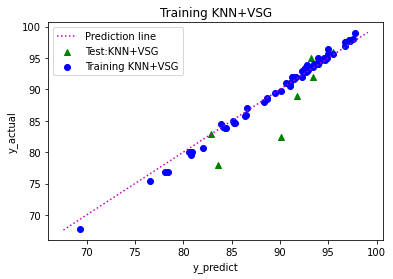

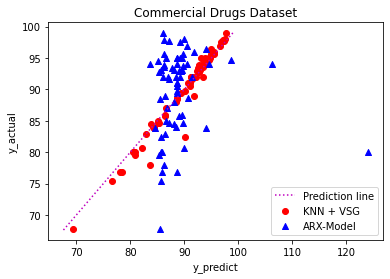

In [37]:
xline1   = np.array(np.linspace(np.min(Y)-0.1, np.max(Y)+0.1, 150))
yline1   = np.array(np.linspace(np.min(Y)-0.1, np.max(Y)+0.1, 150))

plt.figure()
plt.scatter(y_pred_VSG_test,Y_test,    c='g', marker = '^', label = "Test:KNN+VSG")
plt.scatter(y_pred_VSG_train,Y_train , c='b', label = "Training KNN+VSG")
plt.plot(xline1,yline1,'m', linestyle='dotted', label = "Prediction line")
    
# Create legend.
plt.legend(loc='best')
plt.ylabel("y_actual")
plt.xlabel("y_predict") 
plt.title('Training KNN+VSG')
plt.show()


plt.figure()
plt.scatter(y_pred_VSG_ALL,Y_ALL,    c='r', label = 'KNN + VSG')
plt.scatter(Y_ARX,Y_ALL,   c='b',  marker = '^',    label = 'ARX-Model')
plt.plot(xline1,yline1,'m', linestyle='dotted', label = "Prediction line")
    
# Create legend.
plt.legend(loc='best')
plt.ylabel("y_actual")
plt.xlabel("y_predict") 
plt.title('Commercial Drugs Dataset')
plt.show()

### Histogram after adding virtual samples

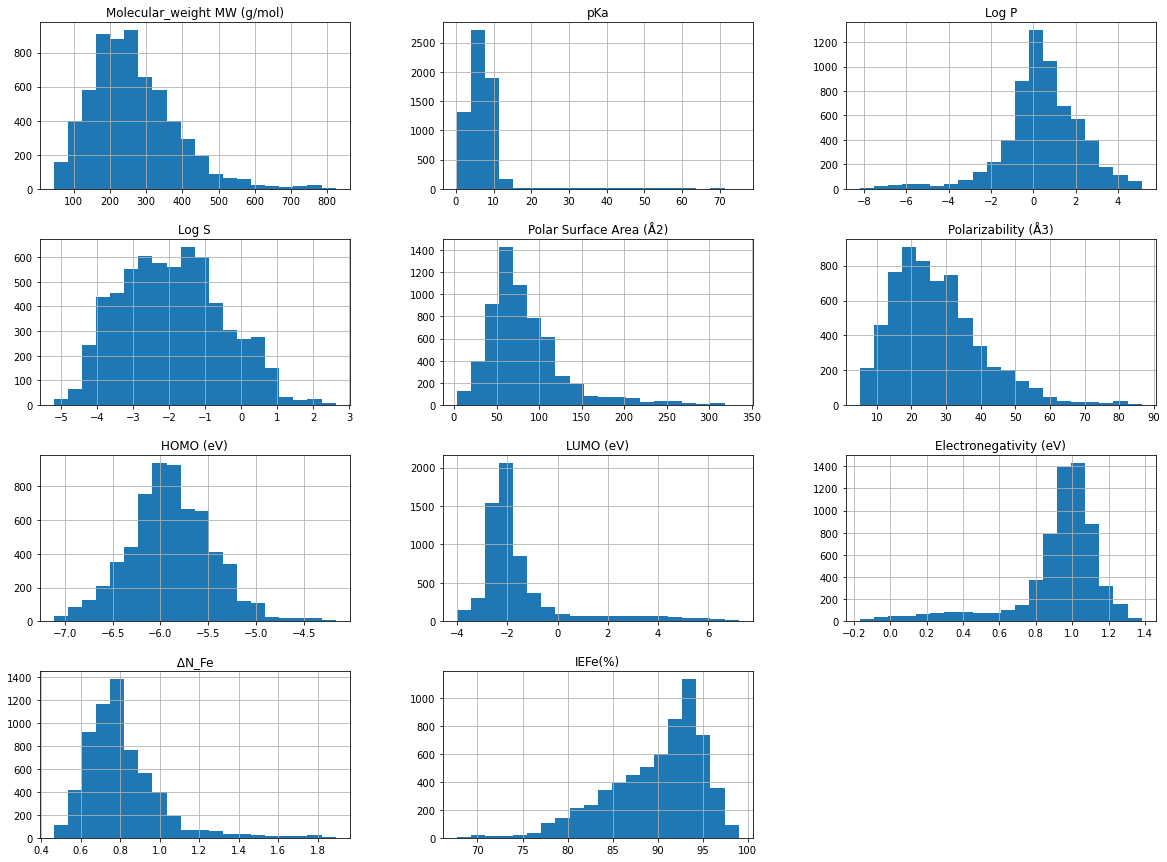

In [38]:
# Histogram setelah ditambah sampel virtual

import pandas as pd
kolom_XY = ['Molecular_weight MW (g/mol)','pKa','Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)',
               'HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ','IEFe(%)']


# utk kebutuhan grafik, X1 hrs di invers supaya besarannya kembali seperti semula
X_inv=Denormalisasi(X1,X_min, X_max)
X_inv = np.round_(X_inv, decimals = 3)
Y_inv=np.round_(Y1, decimals = 3)
Data_VSG = np.hstack((X_inv,Y_inv))
Data_VSG_XY = pd.DataFrame(Data_VSG, columns=kolom_XY)
Data_VSG_XY.hist(bins=20, figsize=(20,15))
plt.show()

In [40]:
# Correlation between descriptors and targets (IE)
from scipy.stats import spearmanr  

kolom_X = ['Molecular_weight MW (g/mol)','pKa','Log P','Log S','Polar Surface Area (Å2)','Polarizability (Å3)',
               'HOMO (eV)','LUMO (eV)','Electronegativity (eV)',' ΔN_Fe ']

for i in range(len(kolom_X)):
    # calculate spearman's correlation
    x = Data_VSG_XY[kolom_X[i]]
    y = Y1
    coef, p = spearmanr(x, y)
    print(kolom_X[i],': ', np.round(coef,3))
    # interpret the significance
    alpha = 0.05
    
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
        print()
    else:        
        print('Samples are correlated (reject H0) p=%.3f' % p)
        print()


Molecular_weight MW (g/mol) :  0.043
Samples are correlated (reject H0) p=0.001

pKa :  -0.013
Samples are uncorrelated (fail to reject H0) p=0.304

Log P :  0.168
Samples are correlated (reject H0) p=0.000

Log S :  -0.079
Samples are correlated (reject H0) p=0.000

Polar Surface Area (Å2) :  -0.062
Samples are correlated (reject H0) p=0.000

Polarizability (Å3) :  0.1
Samples are correlated (reject H0) p=0.000

HOMO (eV) :  0.208
Samples are correlated (reject H0) p=0.000

LUMO (eV) :  -0.009
Samples are uncorrelated (fail to reject H0) p=0.452

Electronegativity (eV) :  -0.097
Samples are correlated (reject H0) p=0.000

 ΔN_Fe  :  0.247
Samples are correlated (reject H0) p=0.000



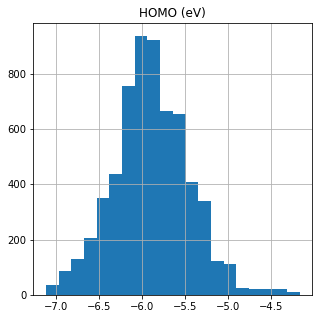

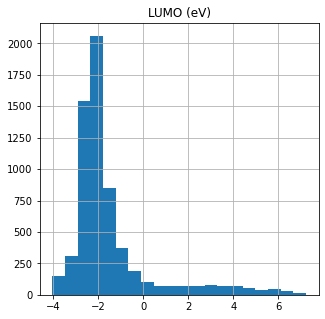

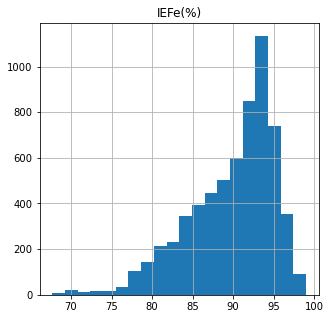

In [41]:
# Histogram: setelah ditambah sampel virtual
%matplotlib inline
import matplotlib.pyplot as plt

Data_VSG_XY[['HOMO (eV)']].hist(bins=20, figsize=(5,5))
Data_VSG_XY[['LUMO (eV)']].hist(bins=20, figsize=(5,5))
Data_VSG_XY[['IEFe(%)']].hist(bins=20, figsize=(5,5))
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'LUMO Distribution')

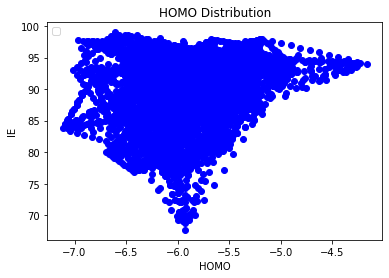

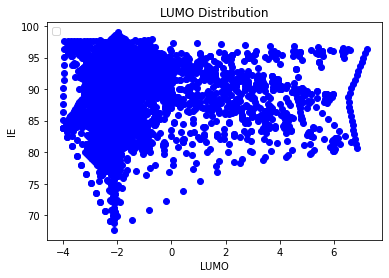

In [42]:
HOMO = Data_VSG_XY['HOMO (eV)'].values
LUMO = Data_VSG_XY['LUMO (eV)'].values
IE   = Data_VSG_XY['IEFe(%)'].values

plt.figure()
plt.scatter(HOMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("HOMO")
plt.title('HOMO Distribution')

plt.figure()
plt.scatter(LUMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("LUMO")
plt.title('LUMO Distribution')

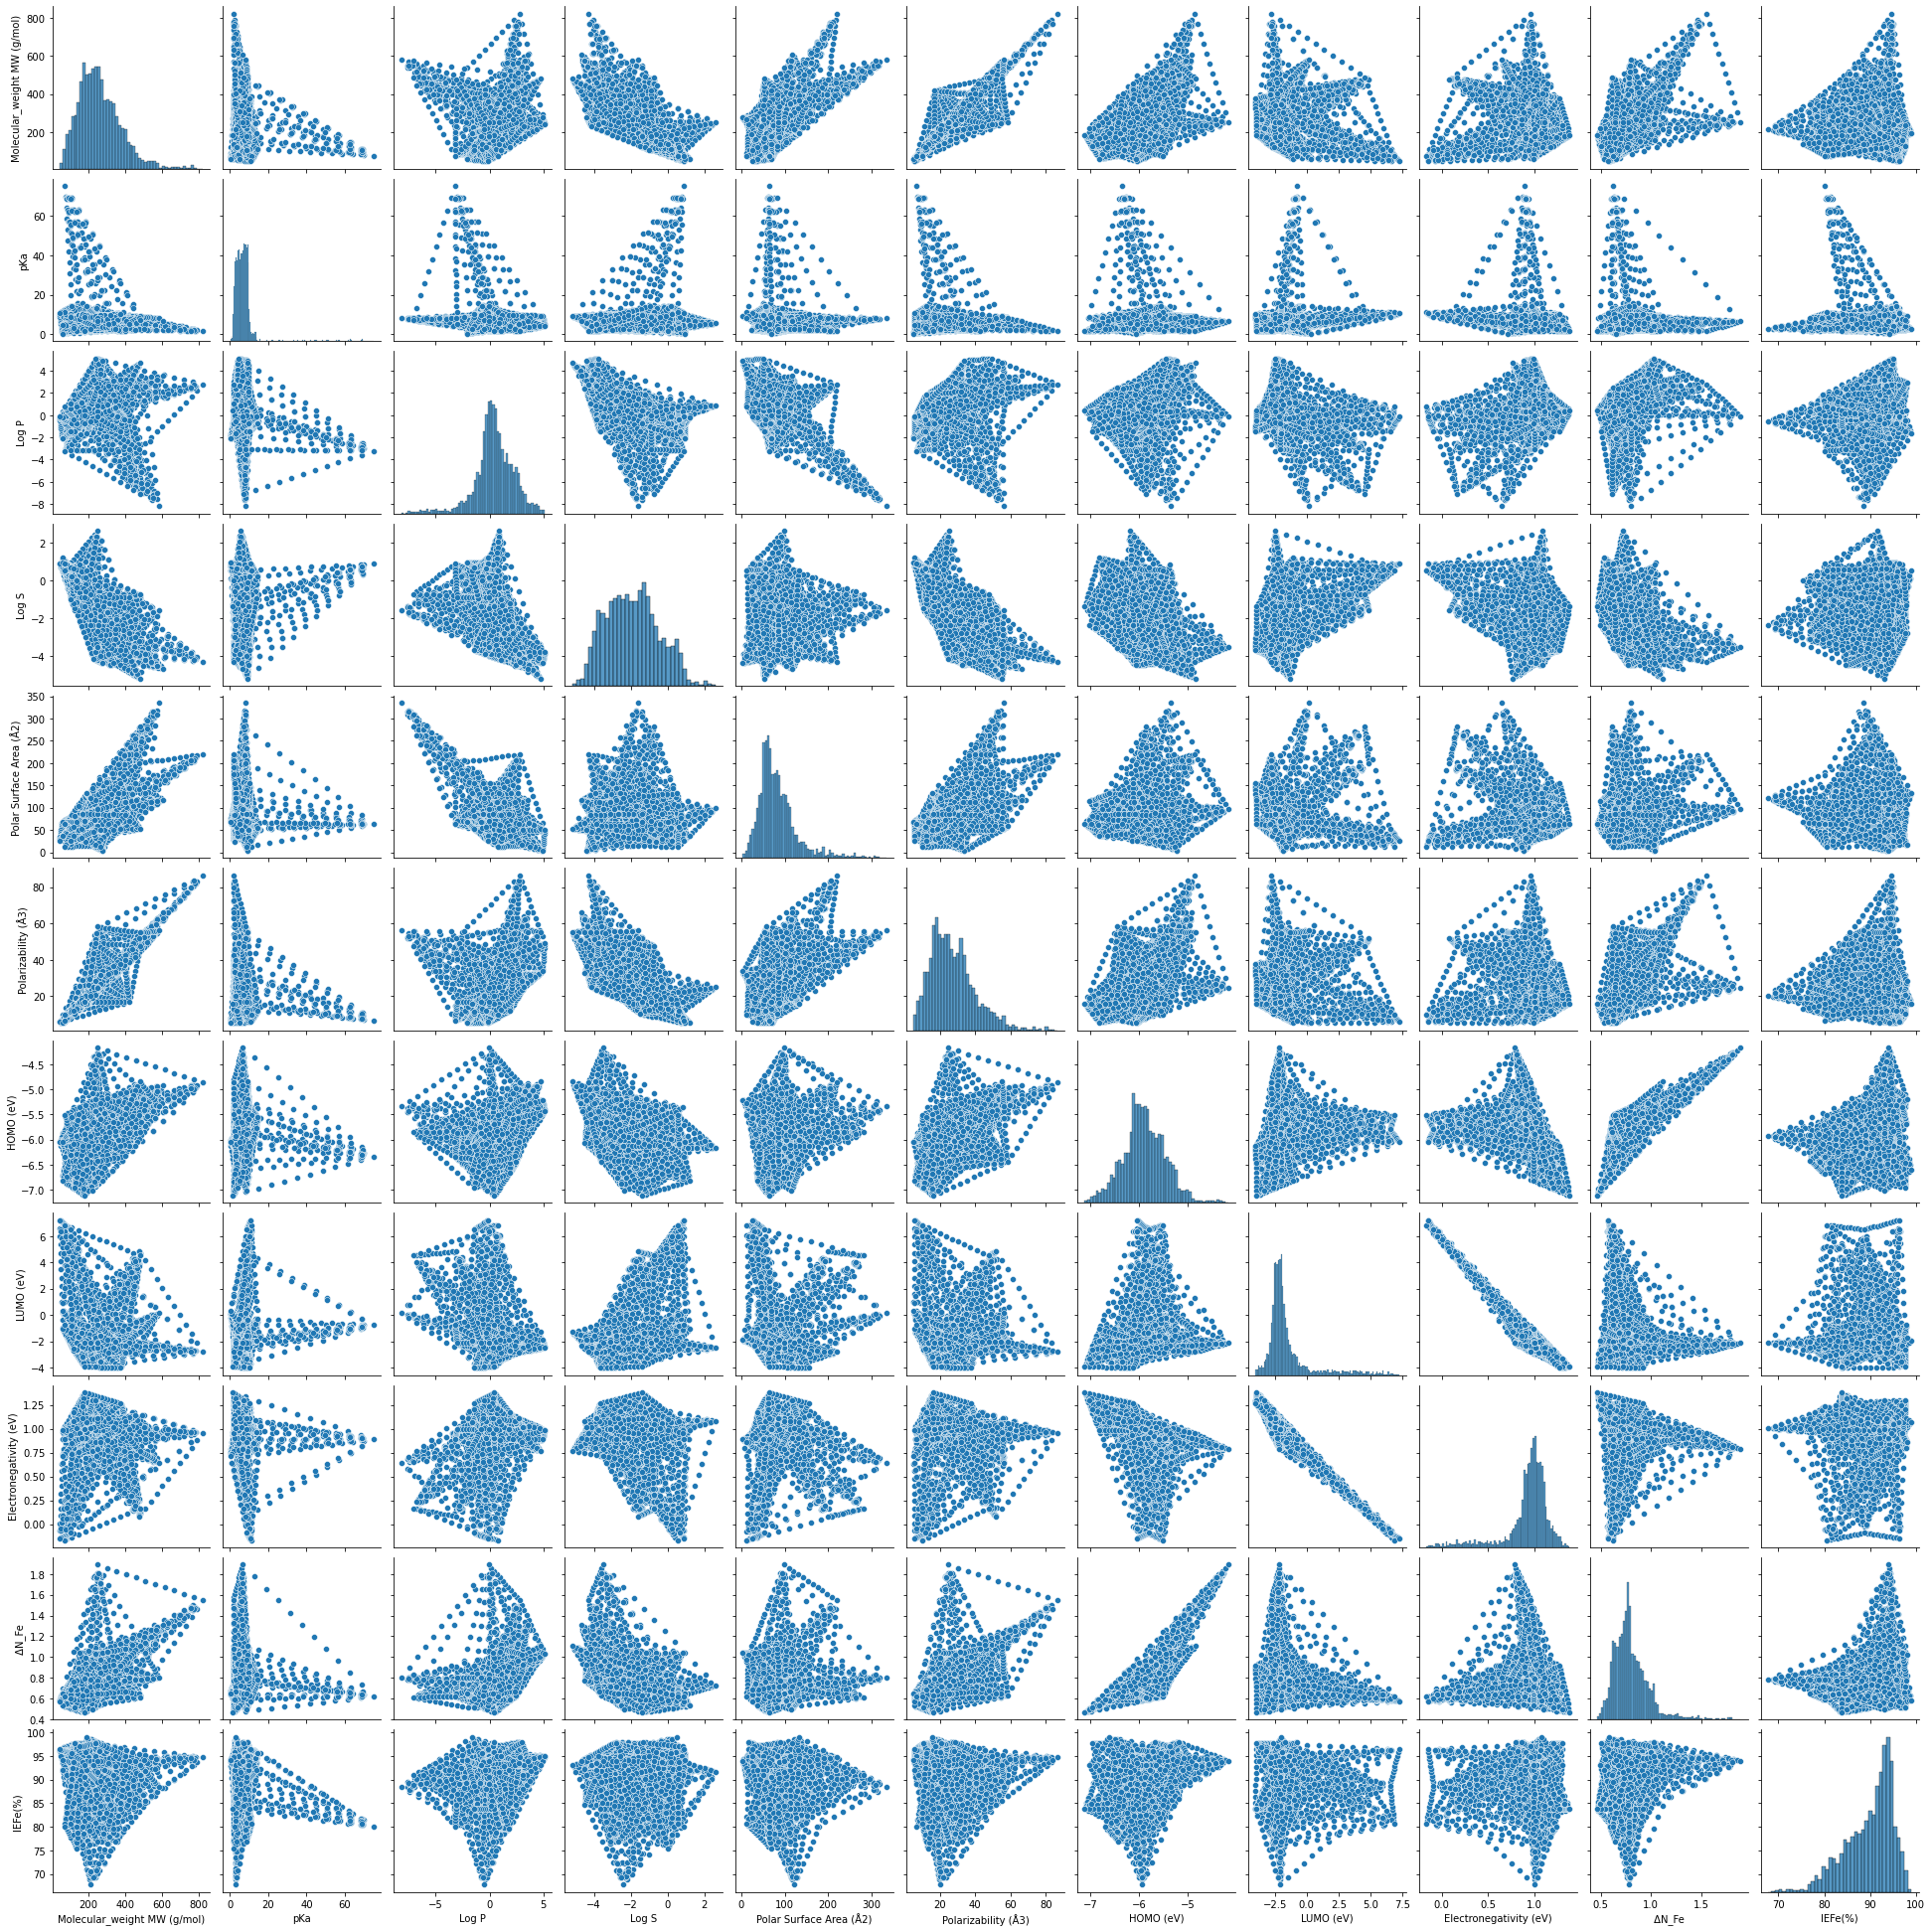

In [43]:
sns.pairplot(Data_VSG_XY)